# FairRankTune Playground

This notebook allows you to play around with using FairRankTune. It contains examples of the core functionalities: data generation, bias measurement, and bias mitigation. 

Everything you need to run the playgound is contained here. Please execute the cells in order. Happy generating, ranking, and measuring!

## Import FairRankTune and Additional Packages

In [1]:
import FairRankTune as frt
import matplotlib.pyplot as plt
import numpy as np
import random 

## Generation 
Here you can generate rankings (by adjusting the group proportions and num_items) and see plots for each metrics across phi values.

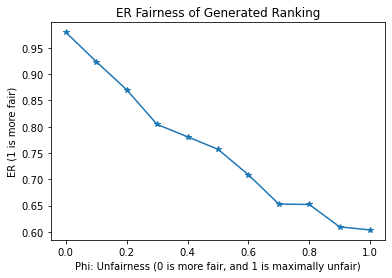

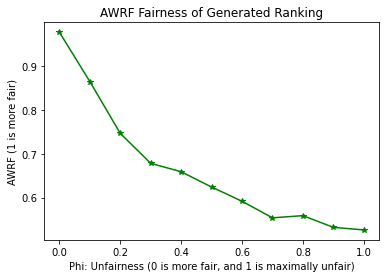

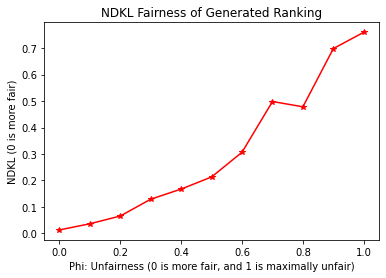

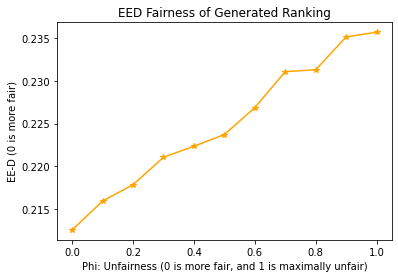

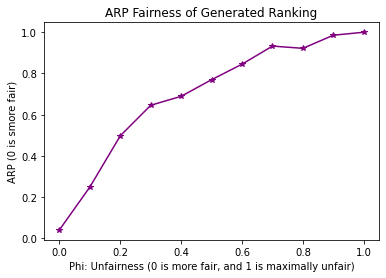

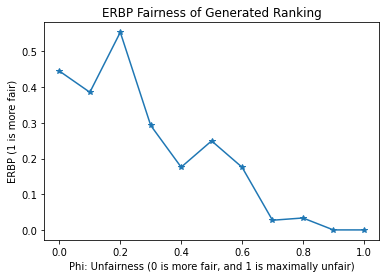

In [2]:
# ADJUST BELOW VARIABLES AS DESIRED
group_proportions = [.2, .3, .5]
num_items = 1000

#FOR REPRODUCABILITY
r_seed = 10
random.seed(r_seed)
np.random.seed(r_seed)


# FOR GENERATING AND PLOTTING
phi_plot = []
ndkl_plot = []
er_plot = []
eed_plot = []
arp_plot = []
awrf_plot = []
erbp_plot = []

for phi in [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]:
    ranking, ranking_ids = frt.GenFromGroups(group_proportions, num_items, phi, 1)
    expdp, avg_exps = frt.EXP(ranking, ranking_ids, 'MinMaxRatio')
    ndkl = frt.NDKL(ranking, ranking_ids)
    eed, avg_exps = frt.EXP(ranking, ranking_ids, 'LTwo')
    arp, _ = frt.ARP(ranking, ranking_ids, 'MaxMinDiff')
    awrf, avg_attns = frt.AWRF(ranking, ranking_ids, 1/num_items, 'MinMaxRatio')
    erbp, avg_erbexp = frt.ERBP(ranking, ranking_ids, 'MinMaxRatio', .9)
    phi_plot.append(phi)
    ndkl_plot.append(ndkl)
    er_plot.append(expdp)
    eed_plot.append(eed)
    arp_plot.append(arp)
    awrf_plot.append(awrf)
    erbp_plot.append(erbp)


#plot ER
xpoints = phi_plot
ypoints = er_plot


plt.ylabel("ER (1 is more fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("ER Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*')
plt.show()

# plot AWRF
xpoints = phi_plot
ypoints = awrf_plot

plt.ylabel("AWRF (1 is more fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("AWRF Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='green')
plt.show()

# plot NDKL
xpoints = phi_plot
ypoints = ndkl_plot

plt.ylabel("NDKL (0 is more fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("NDKL Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='red')
plt.show()

#plot EE-D
xpoints = phi_plot
ypoints = eed_plot

plt.ylabel("EE-D (0 is more fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("EED Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color = 'orange')
plt.show()

# plot ARP
xpoints = phi_plot
ypoints = arp_plot

plt.ylabel("ARP (0 is smore fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("ARP Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*', color='purple')
plt.show()


#plot ERBP
xpoints = phi_plot
ypoints = erbp_plot


plt.ylabel("ERBP (1 is more fair)")
plt.xlabel("Phi: Unfairness (0 is more fair, and 1 is maximally unfair)")
plt.title("ERBP Fairness of Generated Ranking")
plt.plot(xpoints, ypoints, marker='*')
plt.show()

# Generate an Unfair Ranking & Re-rank it to be Fair (Statistical Parity Measures)
Here you can generate an unfair ranking, use DetConstSort to re-rank it, and see how the ranking becomes fairer.

In [3]:
#generate unfair ranking
phi = 1
group_proportions = np.asarray([.2, .6, .1, .1])
num_items = 1000
score_dist = 'uniform' #give items scores from a uniform distribution
r_cnt = 1
ranking, groups, scores = frt.ScoredGenFromGroups(group_proportions, num_items, phi, r_cnt, score_dist)

#measure bias
expOLD, avg_exps = frt.EXP(ranking, groups, 'MinMaxRatio')
ndklOLD = frt.NDKL(ranking, groups)
eedOLD, avg_exps = frt.EXP(ranking, groups, 'LTwo')
arpOLD, _ = frt.ARP(ranking, groups, 'MaxMinDiff')
awrfOLD, avg_attns = frt.AWRF(ranking, groups, 1/num_items, 'MinMaxRatio')
erbpOLD, avg_erbexp = frt.ERBP(ranking, groups, 'MinMaxRatio', .9)

print("ER fairness prior to reranking: ", expOLD)
print("NDKL fairness prior to reranking: ", ndklOLD)
print("EED fairness prior to reranking: ", eedOLD)
print("ARP fairness prior to reranking: ", arpOLD)
print("AWRF fairness prior to reranking: ", awrfOLD)
print("ERBP fairness prior to reranking: ", erbpOLD)


ER fairness prior to reranking:  0.5084649520036326
NDKL fairness prior to reranking:  0.8793415021003218
EED fairness prior to reranking:  0.29886147753248865
ARP fairness prior to reranking:  1.0
AWRF fairness prior to reranking:  0.5295264904899666
ERBP fairness prior to reranking:  8.295910555886975e-20


In [4]:
#rerank to be fair
distribution = np.asarray([.2, .6, .1, .1])
reranking, reranking_ids, reranking_scores = frt.DETCONSORT(ranking, groups, scores, distribution, 1000)

#measure bias again
expPOST, avg_exps = frt.EXP(reranking, reranking_ids, 'MinMaxRatio')
ndklPOST = frt.NDKL(reranking, reranking_ids)
eedPOST, avg_exps = frt.EXP(reranking, reranking_ids, 'LTwo')
arpPOST, _ = frt.ARP(reranking, reranking_ids, 'MaxMinDiff')
awrfPOST, avg_attns = frt.AWRF(reranking, reranking_ids, 1/num_items, 'MinMaxRatio')
erbpPOST, avg_erbexp = frt.ERBP(ranking, reranking_ids, 'MinMaxRatio', .9)
print("ER fairness after reranking: ", expPOST)
print("NDKL fairness after reranking: ", ndklPOST)
print("EED fairness after reranking: ", eedPOST)
print("ARP fairness after reranking: ", arpPOST)
print("AWRF fairness after reranking: ", awrfPOST)
print("ERBP fairness after reranking: ", erbpPOST)

ER fairness after reranking:  0.968116325756997
NDKL fairness after reranking:  0.019707785758888565
EED fairness after reranking:  0.24514529012686964
ARP fairness after reranking:  0.006144444444444452
AWRF fairness after reranking:  0.9959743236411414
ERBP fairness after reranking:  0.6181672772042951


## Assess the Impact Fair Ranking on Score-based Fairness Meaures
Here you can see the result, in terms of score-based fairness measures, of using DetConstSort to re-rank a generated ranking.

In [5]:
#measure bias
expuOLD, _ = frt.EXPU(ranking, groups, scores,'MinMaxRatio')
erbrOLD, _ = frt.ERBR(ranking, groups, scores, .9, 'MinMaxRatio')
iaaOLD = frt.IAA(ranking, scores)
# ndklOLD = frt.NDKL(ranking, groups)
# eedOLD, avg_exps = frt.EXP(ranking, groups, 'LTwo')
# arpOLD, _ = frt.ARP(ranking, groups, 'MaxMinDiff')
# awrfOLD, avg_attns = frt.AWRF(ranking, groups, 1/num_items, 'MinMaxRatio')
# erbpOLD, avg_erbexp = frt.ERBP(ranking, groups, 'MinMaxRatio', .9)

print("EXPU group fairness prior to reranking: ", expuOLD)
print("ERBR group fairness prior to reranking: ", erbrOLD)
print("IAA individual fairness prior to reranking: ", iaaOLD)

ValueError: Improper number of dimensions to norm.

In [ ]:
#measure bias again
expuPOST, _ = frt.EXPU(reranking, reranking_ids, reranking_scores, 'MinMaxRatio')
erbrPOST, _ = frt.ERBR(reranking, reranking_ids, reranking_scores, .9, 'MinMaxRatio')
iaaPOST = frt.IAA(reranking, reranking_scores)
# ndklPOST = frt.NDKL(reranking, reranking_ids)
# eedPOST, avg_exps = frt.EXP(reranking, reranking_ids, 'LTwo')
# arpPOST, _ = frt.ARP(reranking, reranking_ids, 'MaxMinDiff')
# awrfPOST, avg_attns = frt.AWRF(reranking, reranking_ids, 1/num_items, 'MinMaxRatio')
# erbpPOST, avg_erbexp = frt.ERBP(ranking, reranking_ids, 'MinMaxRatio', .9)
print("EXPU group fairness after reranking: ", expuPOST)
print("ERBR group fairness after reranking: ", erbrPOST)
print("IAA individual fairness after reranking: ", iaaPOST)
# print("EED fairness after reranking: ", eedPOST)
# print("ARP fairness after reranking: ", arpPOST)
# print("AWRF fairness after reranking: ", awrfPOST)
# print("ERBP fairness after reranking: ", erbpPOST)